### Imports

In [93]:
import pandas as pd
from matplotlib import pyplot as plt

# Leer archivo

In [94]:
# Creamos una lista vacía donde almacenaremos las matrices NumPy
ECAP_cols = []
# Leemos el archivo .xlsx utilizando pandas
df = pd.read_excel('ECAP.xlsx')

# Recorremos cada columna del dataframe
for col in df.columns:
  # Convertimos la columna en una matriz NumPy
  ECAP_array = df[col] .to_numpy()
  # Añadimos la matriz a la lista
  ECAP_cols.append(ECAP_array)
#print(ECAP_cols[5][0])

# Obtención del ECAP de las diferentes series de estimulación

In [95]:
ECAP_array = [] #cada indice correpsonde a un canal del 0 al 11
for NTR_Nr in range(12):
    ECAP = {} # cada canal contiene un dic 
    for type in range(4): # son 4 tipos 
        array = [] # cada item del dic es una lista de tuplas de (tiempo, voltaje)
        for n in range(32): # son 32 samples por tipo
            array.append(( ECAP_cols[5][(n+32*(type) + 128*(NTR_Nr))], ECAP_cols[6][(n+32*(type)+ 128*(NTR_Nr))] ))
        ECAP[type] = array
    ECAP_array.append(ECAP)
#print(ECAP_array[11][3])

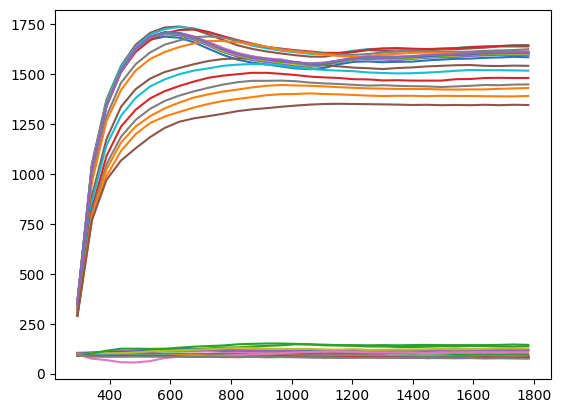

In [96]:
for canal in range(12):
    for key in range(4):
        time, amp = zip(*ECAP_array[canal][key])
        plt.plot(time, amp )
plt.show()

In [97]:
print(ECAP_array[0][0])

[(293, 356), (341, 1037), (389, 1347), (437, 1514), (485, 1618), (533, 1672), (581, 1687), (629, 1682), (677, 1659), (725, 1627), (773, 1596), (821, 1572), (869, 1557), (917, 1548), (965, 1538), (1013, 1528), (1061, 1524), (1109, 1531), (1157, 1549), (1205, 1561), (1253, 1563), (1301, 1559), (1349, 1561), (1397, 1562), (1445, 1568), (1493, 1572), (1541, 1576), (1589, 1577), (1637, 1581), (1685, 1583), (1733, 1586), (1781, 1584)]


In [ ]:
def label_key(key):
    match key:
        case 0:
            return "Raw Probe Alone"
        case 1:
            return "Raw Masker And Probe"
        case 2:
            return "Raw Masker Alone"
        case 3: 
            return "D : Switch On Artefact"

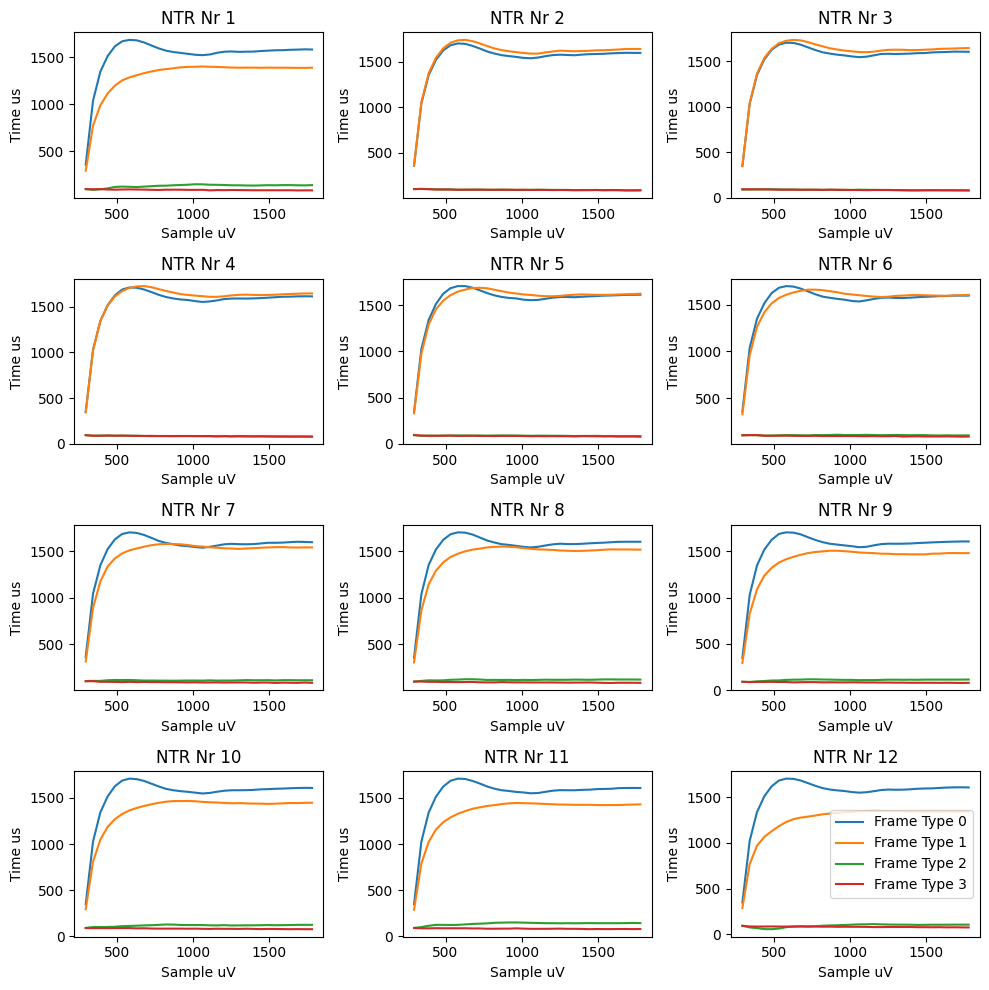

In [105]:
# Create a figure with a subplot for each array
fig = plt.figure(figsize=(10,10))
axs = fig.subplots(4, 3)


# Iterate through the arrays and plot them in the corresponding subplot
for canal in range(12):
    for key in range(4):
        time, amp = zip(*ECAP_array[canal][key])
        row = canal // 3
        col = canal % 3
        axs[row, col].plot(time, amp, label= 'Frame Type {}'.format(label_key(key)))
        axs[row, col].set_title('NTR Nr {}'.format(canal+1))
        axs[row, col].set_xlabel('Sample uV')
        axs[row, col].set_ylabel('Time us')
axs[3,2].legend()

# Show the figure
plt.tight_layout()
plt.show()